## yelpAmericanReviewSentimentAnalysis
This script reads all reviews from the `american_reviews.csv` and performs sentiment analysis. Reviews are categorized into Postive, Netural, or Negative cateogry. The final dataset (with business ids) are saved to `datasets/american_reviews_sentiment.csv`


In [2]:
import json
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import numpy as np
import matplotlib.pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
%matplotlib inline
%config InlineBackend.figure_format='retina'
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [5]:
reviews_df = pd.read_csv("datasets/odyssey_reviews.csv")

In [7]:
del(reviews_df['Unnamed: 0'])
reviews_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
1,EAwh1OmG6t6p3nRaZOW_AA,0,2011-02-25,0,wcqt0III88LEcm19IxFFyA,4,Ribs = amazing\r\n2 hour wait time= not so ama...,0,msQe1u7Z_XuqjGoqhB0J5g
2,faPVqws-x-5k2CQKDNtHxw,0,2015-03-25,2,QHueaxKHuBpbDOkWb0Cyfw,1,People please...the only good thing about this...,2,0AIj432MvowwghnpurtP-Q
3,XiN6fI8I3Mzg2nPRJ9ukRQ,0,2017-09-17,0,1QR6BgzXhpo7ngGEw-BW4w,5,"Had the ruby salad, carpaccio, salmon, and rav...",0,Yy_iGXxLpL6tYDQoE-6XVg
4,JPfi__QJAaRzmfh5aOyFEw,0,2017-01-31,0,mqhCY5oLA1LXP6gZ3JQDTQ,3,The spicy wonton was my favorite. We ordered a...,0,Yy_iGXxLpL6tYDQoE-6XVg


In [8]:
#Change 'text' column type from float to str
reviews_df['text'] = reviews_df['text'].astype(str) 
#Create a new column text length to quantify the length of the review
reviews_df['text length'] = reviews_df['text'].apply(len)

In [12]:
reviews_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text length
0,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1.0,LZp4UX5zK3e-c5ZGSeo3kA,1.0,Terrible. Dry corn bread. Rib tips were all fa...,3.0,msQe1u7Z_XuqjGoqhB0J5g,156
1,EAwh1OmG6t6p3nRaZOW_AA,0,2011-02-25,0.0,wcqt0III88LEcm19IxFFyA,4.0,Ribs = amazing\r\n2 hour wait time= not so ama...,0.0,msQe1u7Z_XuqjGoqhB0J5g,340
2,faPVqws-x-5k2CQKDNtHxw,0,2015-03-25,2.0,QHueaxKHuBpbDOkWb0Cyfw,1.0,People please...the only good thing about this...,2.0,0AIj432MvowwghnpurtP-Q,622
3,ruWTngdiC68O9la27hvvHw,0,2016-02-24,0.0,Tifm4ETlt4FXiuGwhq__lg,4.0,This place is not just a restaurant has a grea...,1.0,dQzQ4bN0Rnb8M-0LqTl3-g,382
4,7UFDAX4wLi6ux5otguYldA,0,2016-04-27,0.0,FqqHziMutfRwq-uJnILH6A,4.0,Just had dinner here last night Got there at 5...,0.0,dQzQ4bN0Rnb8M-0LqTl3-g,658


In [9]:

print(len(reviews_df.business_id))
print(len(reviews_df.business_id.unique()))


564740
4354


In [12]:
list(reviews_df)
reviews_df.isna().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
text length    0
dtype: int64

In [13]:
print(reviews_df.head())

              business_id  cool        date  funny               review_id  \
0  jtQARsP6P-LbkyjbO1qNGg     1  2014-10-23      1  LZp4UX5zK3e-c5ZGSeo3kA   
1  EAwh1OmG6t6p3nRaZOW_AA     0  2011-02-25      0  wcqt0III88LEcm19IxFFyA   
2  faPVqws-x-5k2CQKDNtHxw     0  2015-03-25      2  QHueaxKHuBpbDOkWb0Cyfw   
3  XiN6fI8I3Mzg2nPRJ9ukRQ     0  2017-09-17      0  1QR6BgzXhpo7ngGEw-BW4w   
4  JPfi__QJAaRzmfh5aOyFEw     0  2017-01-31      0  mqhCY5oLA1LXP6gZ3JQDTQ   

   stars                                               text  useful  \
0      1  Terrible. Dry corn bread. Rib tips were all fa...       3   
1      4  Ribs = amazing\r\n2 hour wait time= not so ama...       0   
2      1  People please...the only good thing about this...       2   
3      5  Had the ruby salad, carpaccio, salmon, and rav...       0   
4      3  The spicy wonton was my favorite. We ordered a...       0   

                  user_id  text length  
0  msQe1u7Z_XuqjGoqhB0J5g          156  
1  msQe1u7Z_XuqjGoqhB0

In [15]:
import nltk
nltk.download('vader_lexicon')

sia = SIA()
results = []

for business_id, line, stars in zip(reviews_df['business_id'], reviews_df['text'],reviews_df['stars']):
    pol_score = sia.polarity_scores(line)
    pol_score['review'] = line
    pol_score['business_id'] = business_id
    pol_score['stars'] = stars
    results.append(pol_score)
    
# for line in reviews_df['text'].head(100):
    
#     pol_score = sia.polarity_scores(line)
#     pol_score['review'] = line
    
#     results.append(pol_score)
    
    
# for business_id in reviews_df['business_id'].head(100):
#     pol_score['business_id']= business_id
#     results.append(pol_score)

# print(results[:3])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


In [26]:
#Create a df for our results:
df = pd.DataFrame.from_records(results)
print(df)


#Categorising postive and negative sentiment:

df['label'] = 0
df.loc[df['compound'] > 0.75, 'label'] = 1
df.loc[df['compound'] < 0.3, 'label'] = -1
df.head()


df.groupby(['business_id'])[['compound']].mean() 

                   business_id  compound    neg    neu    pos  \
0       jtQARsP6P-LbkyjbO1qNGg   -0.1779  0.148  0.724  0.128   
1       EAwh1OmG6t6p3nRaZOW_AA    0.9660  0.000  0.725  0.275   
2       faPVqws-x-5k2CQKDNtHxw    0.7749  0.013  0.913  0.074   
3       XiN6fI8I3Mzg2nPRJ9ukRQ    0.9109  0.000  0.666  0.334   
4       JPfi__QJAaRzmfh5aOyFEw    0.8462  0.000  0.816  0.184   
5       OR6iRk0vrMzE-1gLg-WYrw    0.9836  0.037  0.794  0.169   
6       yTWSFoGjkK6pl7kJm8f0Dg    0.9933  0.035  0.848  0.117   
7       d_Go5TsiFMIRtCE6XS8Sjw    0.9974  0.006  0.823  0.171   
8       wVc3g-YfyDvkOLDecpr4DA    0.9992  0.008  0.778  0.214   
9       ioEdisf6TTCoUbfQDnUCjA   -0.3578  0.189  0.662  0.150   
10      Uw-kIS3HTuAohfg0edQZ3Q    0.9977  0.057  0.738  0.205   
11      TFftsYkRIUtdo6ZhRwJ2lQ    0.8976  0.055  0.870  0.075   
12      tEfmHuo_dNanyTaC5PyoOQ    0.9978  0.009  0.838  0.153   
13      uF86ZhygpBEGr3CudNemYA   -0.9937  0.125  0.799  0.076   
14      AercPW1B2YVNK3Usi

,compound
business_id,
--SrzpvFLwP_YFwB_Cetow,0.675843
-1m9o3vGRA8IBPNvNqKLmA,0.911014
-3zffZUHoY8bQjGfPSoBKQ,0.786762
-7-uHFjQLH_uxPauYtd8iA,0.647320
-CLTZ0cO-ooKDDmXHFoGMg,0.753323
-CQokjildrY7UZezXCdEBw,0.878166
-D2vGSq_SvuCmHdqsDxzeA,0.649619
-EohS3nXZGl6odE9Lx5BSw,-0.213440
-FcZY7a7qgxTUlTvwuyJnQ,0.620889


In [27]:
df.head(500)

,business_id,compound,neg,neu,pos,review,stars,label
0,jtQARsP6P-LbkyjbO1qNGg,-0.1779,0.148,0.724,0.128,Terrible. Dry corn bread. Rib tips were all fa...,1,-1
1,EAwh1OmG6t6p3nRaZOW_AA,0.9660,0.000,0.725,0.275,Ribs = amazing\r\n2 hour wait time= not so ama...,4,1
2,faPVqws-x-5k2CQKDNtHxw,0.7749,0.013,0.913,0.074,People please...the only good thing about this...,1,1
3,XiN6fI8I3Mzg2nPRJ9ukRQ,0.9109,0.000,0.666,0.334,"Had the ruby salad, carpaccio, salmon, and rav...",5,1
4,JPfi__QJAaRzmfh5aOyFEw,0.8462,0.000,0.816,0.184,The spicy wonton was my favorite. We ordered a...,3,1
5,OR6iRk0vrMzE-1gLg-WYrw,0.9836,0.037,0.794,0.169,If you've ever driven by High Park on Bloor st...,2,1
6,yTWSFoGjkK6pl7kJm8f0Dg,0.9933,0.035,0.848,0.117,"Food, like fashion, has a lot to do with trend...",2,1
7,d_Go5TsiFMIRtCE6XS8Sjw,0.9974,0.006,0.823,0.171,Located at the top of the restaurant strip on ...,4,1
8,wVc3g-YfyDvkOLDecpr4DA,0.9992,0.008,0.778,0.214,5 Doors North is my neighbourhood spot. I have...,5,1
9,ioEdisf6TTCoUbfQDnUCjA,-0.3578,0.189,0.662,0.150,One of the worst bar experiences I've ever had...,1,-1


In [28]:
#Save our finalised dataset into a separate file: review_df.csv
review_dataset = df[['business_id','review', 'label','stars']]
review_dataset = review_dataset.rename(index=str, columns={"review": "text"})
review_dataset.to_csv('datasets/odyssey_sentiment.csv', mode='a', encoding='utf-8', index=False)
print(review_dataset.head())

              business_id                                               text  \
0  jtQARsP6P-LbkyjbO1qNGg  Terrible. Dry corn bread. Rib tips were all fa...   
1  EAwh1OmG6t6p3nRaZOW_AA  Ribs = amazing\r\n2 hour wait time= not so ama...   
2  faPVqws-x-5k2CQKDNtHxw  People please...the only good thing about this...   
3  XiN6fI8I3Mzg2nPRJ9ukRQ  Had the ruby salad, carpaccio, salmon, and rav...   
4  JPfi__QJAaRzmfh5aOyFEw  The spicy wonton was my favorite. We ordered a...   

   label  stars  
0     -1      1  
1      1      4  
2      1      1  
3      1      5  
4      1      3  


In [29]:
print("Positive Reviews:\n")
print(list(df[df['label'] == 1].review)[:5])

print("\nNegative Reviews:\n")
print(list(df[df['label'] == -1].review)[:5])

Positive Reviews:

['Ribs = amazing\r\n2 hour wait time= not so amazing, but understandable. \r\n\r\nThis place would get 5 stars if they expanded their BBQ restaurant. Their ribs are AMAZING. You get SO much food for the price and it tastes sooo good. Plus, the two hour wait isnt always a bad thing because it gives you an excuse to drink and gamble while you wait!', "People please...the only good thing about this place is the ever apologetic staff.  I didn't come here for the food but rather the bourbon list as I was told it was amazing....the bourbon list was if fact amazing....problem was they actually didnt carry any of the bourbon on the list....after being told up front ALL of the pappy van Winkle was out of stock, they list like 6 of them on their menu, I was shot down on my next 5 attempts to order a bourbon....all put of stock.  Really?  The bartender kept apologizing profusely but it was apparently all ongoing issue.  don't waste you time here...for the bourbon any way", 'Had

In [30]:
#Check total positive reviews:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)


 1    412499
-1     88271
 0     63970
Name: label, dtype: int64
 1    73.042285
-1    15.630379
 0    11.327336
Name: label, dtype: float64


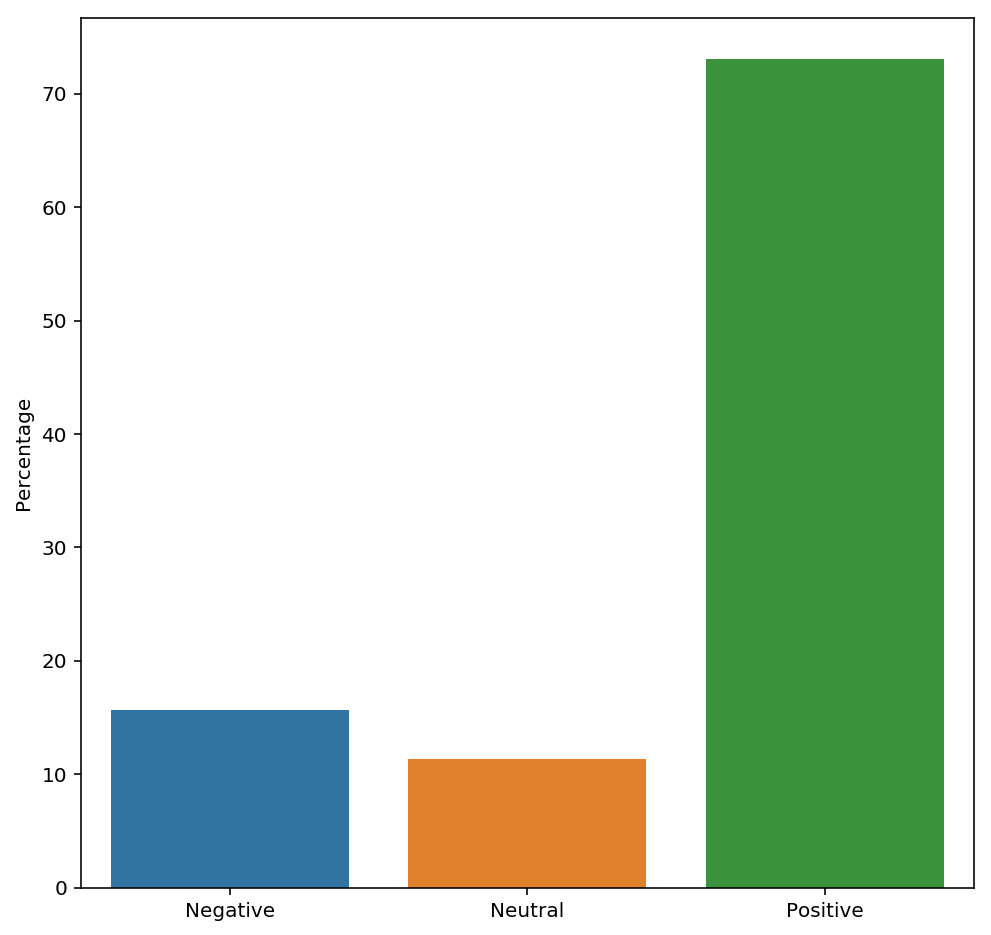

In [31]:
#Visualise our data:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [34]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize, RegexpTokenizer
review_example=review_dataset['text'].head(5)[0]
print(word_tokenize(review_example, language='english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
['Terrible', '.', 'Dry', 'corn', 'bread', '.', 'Rib', 'tips', 'were', 'all', 'fat', 'and', 'mushy', 'and', 'had', 'no', 'flavor', '.', 'If', 'you', 'want', 'bbq', 'in', 'this', 'neighborhood', 'go', 'to', 'john', 'mulls', 'roadkill', 'grill', '.', 'Trust', 'me', '.']


In [35]:
#Remove punctuation
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(review_example)

['Terrible',
 'Dry',
 'corn',
 'bread',
 'Rib',
 'tips',
 'were',
 'all',
 'fat',
 'and',
 'mushy',
 'and',
 'had',
 'no',
 'flavor',
 'If',
 'you',
 'want',
 'bbq',
 'in',
 'this',
 'neighborhood',
 'go',
 'to',
 'john',
 'mulls',
 'roadkill',
 'grill',
 'Trust',
 'me']

In [19]:
#In the above tokens there are a lot of irrelevant words (stopwords) like ’the, ’is’, ’and’, ’what’, etc. 
#Those are irrelevant to text sentiment, as they don't provide any valuable information. 
stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [20]:
#Create a function that reads in reviews and removes stopwords:
def process_text(reviews):
    tokens = []
    for line in reviews:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [21]:
#Tops positive words in the positive set
pos_lines = list(df[df.label == 1].review)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('food', 209570),
 ('good', 192983),
 ('great', 155428),
 ('place', 148554),
 ('service', 122708),
 ('like', 105623),
 ('one', 91363),
 ('time', 90233),
 ('get', 81699),
 ('really', 81585),
 ('back', 81331),
 ('would', 80747),
 ('vegas', 79523),
 ('ordered', 75132),
 ('go', 74650),
 ('us', 73865),
 ('burger', 70308),
 ('also', 65681),
 ('chicken', 64385),
 ('menu', 62841)]

In [23]:
#Examine negative words
neg_lines = list(df[df.label == -1].review)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('food', 33578),
 ('service', 19742),
 ('place', 17393),
 ('us', 15776),
 ('get', 14144),
 ('one', 13566),
 ('back', 13303),
 ('time', 12941),
 ('good', 12799),
 ('like', 12329),
 ('would', 12054),
 ('order', 11892),
 ('ordered', 11171),
 ('even', 10993),
 ('go', 10864),
 ('came', 10701),
 ('got', 10326),
 ('minutes', 9662),
 ('never', 9634),
 ('bad', 8412)]

In [36]:
grpd = review_dataset.groupby(['business_id','label']).size().reset_index(name='size')
grpd

,business_id,label,size
0,--SrzpvFLwP_YFwB_Cetow,-1,7
1,--SrzpvFLwP_YFwB_Cetow,0,3
2,--SrzpvFLwP_YFwB_Cetow,1,34
3,-1m9o3vGRA8IBPNvNqKLmA,-1,2
4,-1m9o3vGRA8IBPNvNqKLmA,0,12
5,-1m9o3vGRA8IBPNvNqKLmA,1,153
6,-3zffZUHoY8bQjGfPSoBKQ,-1,64
7,-3zffZUHoY8bQjGfPSoBKQ,0,41
8,-3zffZUHoY8bQjGfPSoBKQ,1,511
9,-7-uHFjQLH_uxPauYtd8iA,-1,2


In [37]:
grpd.to_csv('datasets/odyssey_sentiment_grp.csv', index=False)

In [45]:
a = reviews_df['business_id'].unique()
len(a)

4354